#### 1) A figura abaixo mostra os exemplos de treino e as regiões de decisão de uma SVM (ou SVC, de “support vector classifier”) para um problema binário (duas classes) onde o vetor x de “features” de entrada tem dois parâmetros (weight e length). Os pontos em azul e vermelho, representam os exemplos de cada classe. As regiões em azul e vermelho representam as regiões nas quais o classificador irá prever uma classe azul e vermelha, respectivamente. Olhando para as figuras, informe: 


#### a) Quantos erros cada SVM possui no conjunto de treino ?
    Resposta: LinearSVC = 2 erros; SVC = 1 erro; RBF = 1 erro e Polinomial = 0 erros

#### b) Qual a que lhe parece ser a melhor SVM? Por que?
    Resposta: Baseado na análise das figuras, a SVC com Kernel polinomial, pois não apresenta nenhum erro.


#### 2) A regularização é uma importante ferramenta para controlar a “complexidade do modelo” durante a fase de seu projeto. No projeto de uma SVM, o hiperparâmetro C é usado para efetuar a regularização do modelo na etapa de seleção do modelo, ou seja, quando os hiperparâmetros são variados e observamos o impacto através do erro de classificação no conjunto de validação. Suponha que você se encontra em uma situação onde está descontente com o atual resultado de sua SVM e observa que o número de vetores de suporte está relativamente pequeno. Você quer potencialmente aumentar o número de vetores de suporte, fazendo com que sua nova R: SVM seja um modelo mais “complexo”. Para isso, você deve aumentar ou diminuir o parâmetro “C” da classe SVC do scikit-learn?
    Resposta: Aumentar o parâmetro C, tendo em vista que um valor menor de C leva a uma via mais larga e com mais violações de margem, porém com uma melhor generalização. Com o aumento de C há um aumento da complexidade. 
    Se o modelo de SVM estiver dando overfitting pode tentar sua regularização reduzindo o valor de C.(Por tentativa e erro)



#### 3) Um classificador usa vetores de entrada com dimensão K=5 “features”. Após treinar uma SVM linear, o número de vetores de suporte foi de 450 exemplos. Neste caso, calcular o kernel linear corresponde a um produto interno entre dois vetores de dimensão K=5, cada, o que requer K multiplicações e K-1 adições. Estime o fator F = Coriginal / Cperceptron de redução do custo computacional da etapa de teste ao converter esta SVM linear para um perceptron. Assuma que os custos Coriginal e Cperceptron correspondem ao número de multiplicações e adições usando-se, respectivamente, a SVM original com os 450 vetores de suporte e após sua conversão para perceptron.


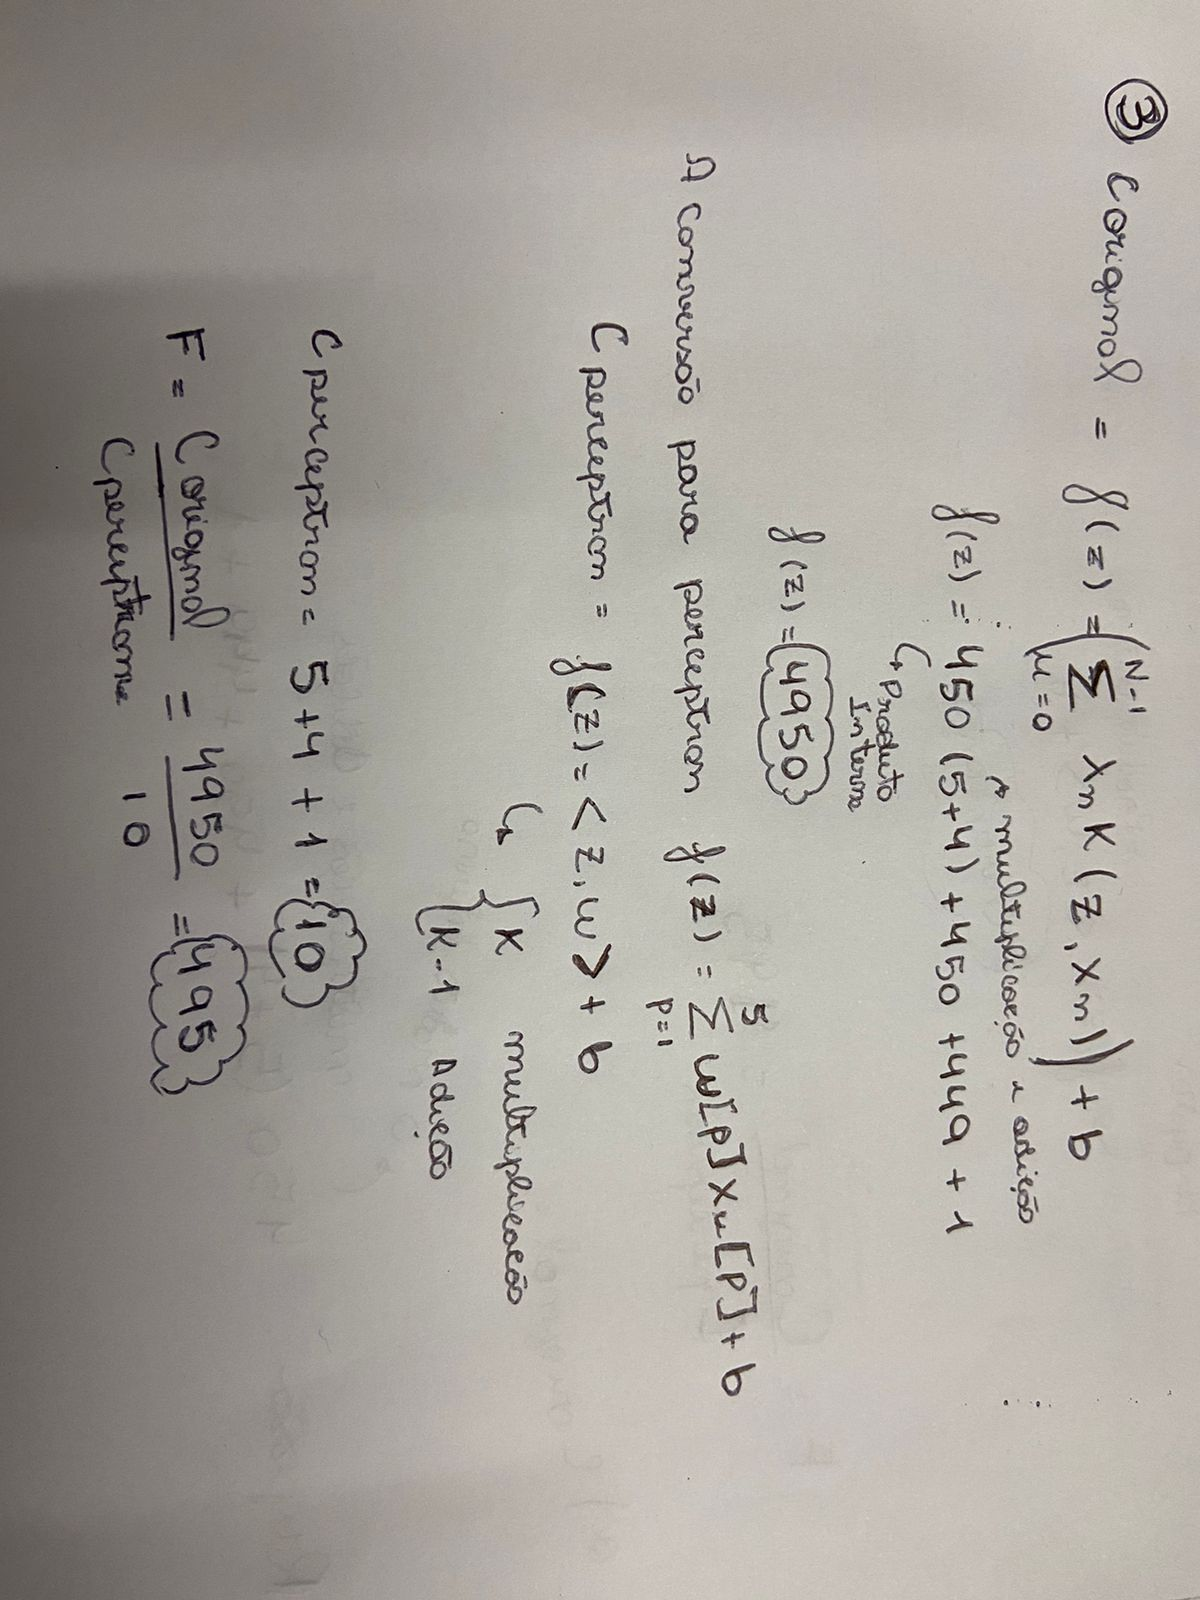

#### 4) Interpretação do resultado de projeto de SVMs. 
    O treinamento de uma SVM linear usando a classe SVC do sklearn retornou o resultado: 
                    svm.n_support_= [1 2]  # número de vetores de suporte por classe
              svm.support_vectors_= [[ 1. 4.]  # vetores de suporte 
                                    [-2.  3.]
                                    [-2. -5.]]
                    svm.dual_coef_= [[-0.5 -0.3 0.8]] # valores de \lambda
                    svc.intercept_= [-2] # “bias”
    Observe que esta questão não usa o conjunto de treino indicado, mas outro. Pede-se:


#### a) A função de decisão para essa SVM de acordo com a fórmula geral:
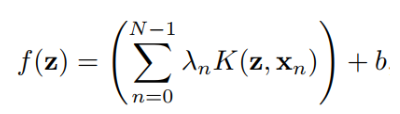

    Resposta: $f(z) = (-0.5k(z, [1, 4]) - 0.3k(z, [-2, 3]) + 0.8*k(z, [-2, -5])) - 2$

#### b) A função de decisão desta SVM quando escrita como um perceptron f(z)=<z,w>+b.
    Resposta: $f(z) = <z, [-1.5, -6.9]> - 2$


#### c) A saída da função de decisão quando o vetor de entrada é z=[0, 0] e o respectivo rótulo predito y assumindo-se que y = I( f(z) > 0 ), onde I(.) é a função “indicador”, que é 1 se o argumento é verdadeiro, ou 0 em caso contrário.
    Resposta: $f(z) = <z, [-1.5, -6.9]> - 2    teste z = [0, 0]$   
          $f(z) = <[0, 0], [-1.5, -6.9]> - 2$               ;
          $f(z) =  (0*(-1.5) + 0*(-6.9)) - 2 = -2$  
          Como f(z) = - 2, o argumento da função indicador é falso, dessa forma, saída é 0.


#### 5) Interpretação do resultado de projeto de SVMs. O código ak_svm_prova1.py e o conjunto de treino em dataset_train.txt foram usados para gerar a figura e o log (saída de texto) abaixo. Em suma, foram treinadas 4 SVMs, duas com kernel linear (SVMs 1 e 2) e outras duas com kernel não-linear (SVMs 3 e 4). 




Adapted from https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

Normalized training set:
[[ 0. -4.]
 [-1.  2.]
 [ 3.  3.]
 [-5. -6.]
 [-4. -5.]
 [-2. -2.]]
#### 1) Linear SVM with LinearSVC #####
linear_svc.coef_= [[-0.68611287 -0.10653139]]
linear_svc.intercept_= [-0.99556119]
[LibSVM]

#### Generic SVMs with SVC #####
####  2 ) SVM with SVC ####
 {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': False, 'tol': 0.001, 'verbose': 1}
svm.n_support_= [2 1]
svm.support_= [0 1 5]
svm.support_vectors_= [[ 0. -4.]
 [-1.  2.]
 [-2. -2.]]
svm.dual_coef_= [[-0.45994152 -0.27992202  0.73986354]]
svc.intercept_= [-1.79954513]
At most 10 decisions: svm.decision_function(X)= [-1.00032491 -0.99935019 -5.99837547  5.39831049  3.99870038  0.99967509]

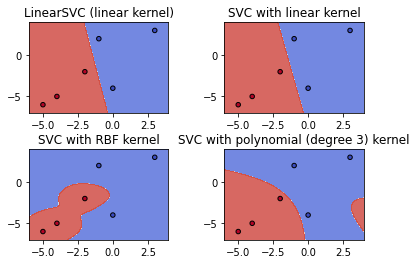

In [7]:
'''
Adapted from https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
'''
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

'''
Here I will adopt the simple approach of dividing the first
feature by 1000, but the professional normalization is obtained
with code such as:
https://scikit-learn.org/stable/modules/preprocessing.html
'''

def load_train_dataset_and_normalize_first_feature():
    #from numpy import genfromtxt
    my_data = np.genfromtxt('dataset_train.txt', delimiter=',')
    X = my_data[:,:2] # fish length and weight
    X[:,0] = X[:,0]/1000.0 #simple normalization
    y = np.ravel(my_data[:,2:],order='C') #convert column vector into 1D array
    feature_names = ('Length', 'Weight') #x and y
    print('Normalized training set:')
    print(X)
    return X,y,feature_names

def convert_linear_SVM_to_perceptron(support_vectors, dual_coef):
    dual_coef = np.ravel(dual_coef,order='C') #convert to a 1D vector
    num_support_vectors = len(dual_coef)
    if support_vectors.shape[0] != num_support_vectors:
        raise Exception('support_vectors.shape[0] != num_support_vectors')
    input_space_dimension = support_vectors.shape[1]
    perceptron_weights = np.zeros((input_space_dimension))
    for sv in range(num_support_vectors):
        perceptron_weights += dual_coef[sv] * support_vectors[sv]
    return perceptron_weights

def calculate_intercept(perceptron_weights,support_vectors,support_vector_indices,labels):
    '''
    https://stats.stackexchange.com/questions/211310/deriving-the-intercept-term-in-a-linearly-separable-and-soft-margin-svm
    '''
    num_support_vectors = support_vectors.shape[0]
    #input_space_dimension = support_vectors.shape[1]
    max_negative = -1e30
    min_positive = 1e30
    for i in range(num_support_vectors):
        #note that labels has all training examples, not only support vectors,
        #so use support_vector_indices to get the proper index in training set
        this_label = labels[support_vector_indices[i]]
        this_inner_product = np.inner(perceptron_weights, support_vectors[i])
        if this_label > 0:
            if this_inner_product < min_positive:
                min_positive = this_inner_product
        else:
            if this_inner_product > max_negative:
                max_negative = this_inner_product
    return -(max_negative+min_positive)/2.0

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

np.random.seed(30) #reproducible experiments

#Choose here the dataset:
X,y,feature_names = load_train_dataset_and_normalize_first_feature()

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1  # SVM regularization parameter

linear_svc = svm.LinearSVC(C=C, max_iter=1e4, dual=True, tol=1e-10)
svc_with_linear_kernel = svm.SVC(kernel='linear', C=C, verbose=1, shrinking=False)
rbf_svm = svm.SVC(kernel='rbf', gamma=0.7, C=C) #RBF also called Gaussian
polynomial_svm = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C, coef0=0)

print('#### 1) Linear SVM with LinearSVC #####')
#This is restricted to linear SVMs. It does not return the support vectors but the primal perceptron
linear_svc.fit(X,y) #https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
print('linear_svc.coef_=',linear_svc.coef_)
print('linear_svc.intercept_=',linear_svc.intercept_)
#print(linear_svc.offset_)
svm_scores = np.zeros((4,))
svm_scores[0] = linear_svc.score(X,y)

#These are generic SVMs
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
svc_with_linear_kernel.fit(X,y)
rbf_svm.fit(X,y) 
polynomial_svm.fit(X,y)

tuple_of_svms = (svc_with_linear_kernel, rbf_svm, polynomial_svm)

print('\n\n#### Generic SVMs with SVC #####')
for i in range(3):
    svm = tuple_of_svms[i]
    print('#### ', str(i+2), ') SVM with SVC ####\n', svm.get_params())
    print('svm.n_support_=',svm.n_support_) #Number of support vectors for each class.
    print('svm.support_=',svm.support_) #Indices of support vectors
    print('svm.support_vectors_=',svm.support_vectors_) #the support vectors
    print('svm.dual_coef_=',svm.dual_coef_) #lambdas
    print('svc.intercept_=',svm.intercept_) #bias
    decisions = svm.decision_function(X)
    if len(decisions) > 10: #don't show too many numbers
        decisions = decisions[:10]
    print('At most 10 decisions: svm.decision_function(X)=',decisions)
    svm_scores[i+1] = svm.score(X,y)
    print('Accuracy via svm.score(X,y)=',svm_scores[i])
    #SVC has parameter gamma for polynomial and RBF kernels
    print('Gamma=', svm._gamma) #gamma indicates "auto" and other input options, while _gamma indicates the value
    if i == 0: #print(svm.coef_) #cannot be used with non-linear SVMs
        print('svc_with_linear_kernel.coef_=',svm.coef_)
        #print('linear_svc.intercept_=',svm.intercept_)
        perceptron_weights = convert_linear_SVM_to_perceptron(svm.support_vectors_, svm.dual_coef_)
        print('Estimated perceptron_weights=', perceptron_weights)
        bias = calculate_intercept(perceptron_weights,svm.support_vectors_,svm.support_,y)
        print('Estimated bias=', bias)


#Plot:
models = (linear_svc, svc_with_linear_kernel, rbf_svm, polynomial_svm)

# title for the plots
titles = ('LinearSVC (linear kernel)',
        'SVC with linear kernel',
        'SVC with RBF kernel',
        'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xlabel(feature_names[0])
    #ax.set_ylabel(feature_names[1])
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.set_title(title)

print("######################## Summary ########################")
print(titles,'have accuracies:')
print('svm_scores=',svm_scores)
plt.show()

#### a) Quais as expressões para as SVMs 3 e 4 (não-lineares) e para a SVM 2 (linear) de acordo com a nomenclatura abaixo (escreva a “fórmula” da função de decisão de cada SVM indicando o valor do bias “b”, etc., considerando que z e xn são vetores já normalizados (com o primeiro elemento dividido por 1000).
$f(z)=(\sum^{N-1}_{n=0}λ_nK(z,x_{n}))+b$

    Resposta:  
        SVM 2:
$f(z) = (-0.46*k(z , [0, -4]) - 0.28*k(z, [1,-2])+0.74*k(z, [-2,-2])) - 1.8$  
        SVM 3 RBF: 
$f(z) = (-0.92e^{-0.7||z-[0, -4]||^2} - 0.91*k(z,[-1,  2.]) - 0.91*k(z,[3, 3]) + 0.87*k(z,[-5, -6]) + 0.87*k(z,[-4. -5]) + k(z, [-2. -2]))   - 0.087$
        SVM3: 
$f(z) = -0.92e^{0.7||z  - [0, 4]||^2}-0.91e^{-0.7||z  - [-1, 2]||^2}-0.91e^{-0.7||z  - [3, 3]||2}-0.87e^{-0.7||z  - [-5, -6]||^2}-0.87e^{-0.7||z  - [-4, -5]||^2} +e^{-0.7||z  - [-2, -2]||^2} - 0.087$
        SVM 4: 
$f(z) = - 0.009*(k(z,[0. -4]))^3 - 0.031*(k(z,[-1,  2]))^3 + 0.040*(k(z,[-2. -2]))^3  -1.03$

#### b) Quais as expressões para as SVMs 1 e 2 (lineares) quando escritas como perceptrons?
    Resposta: SVM 1 e 2:  $f(z)=<z,w>+b$

#### c) Suponha que para a SVM 2 (linear), apenas as informações abaixo fossem fornecidas. Com elas, você já pôde escrever essa SVM no formato geral de uma SVM, como no item a). Explique agora com clareza quais os passos que você adotaria para converter essa SVM linear em um perceptron como descrito no item b) e indique em termos do número de multiplicações e adições, qual economia no custo computacional que a implementação como perceptron alcança.
              svm.n_support_= [2 1]
                svm.support_= [0 1 5]
        svm.support_vectors_= [[ 0. -4.]
                               [-1.  2.]
                               [-2. -2.]]
              svm.dual_coef_= [[-0.45994152 -0.27992202  0.73986354]]
              svc.intercept_= [-1.79954513]
Resposta: 

          1º passo: Identificar os vetores de suporte [0, -4][-1, 2][-2, -2] e seus respectivos 𝝺 [-0.46, -0.28, 0.74] e bias [-1.8] aproximados.
          2º passo: Escrever para o formato geral utilizando utilizando os dados obtidos no primeiro passo e o kernel linear: f(z) =  -0.46<z,[0, -4]> -0.28<z,[-1, 2]> +0.74<z,[-2, -2]> -1.8
          3º passo: Converter a forma geral para um perceptron utilizando as propriedades da linearidade colocando z em evidência e obtendo um novo vetor w e somando o bias ao final de tudo tem-se então : f(z) =  <z,[-1.2, -0,2]> -1.8 
          Em questões de custo operacional a forma geral possui 15 operações enquanto o perceptron possui apenas 4 operações.


#### d) Para as SVMs 3 e 4 (não-lineares), indique:
#### d.1) Qual o número total de vetores de suporte (SVs), considerando todas as classes.
    Resposta:
            SVM 3 possui 6 vetores de suporte: 3 para classe 0 e 3 para classe 1.
            SVM 4 possui 3 vetores de suporte: 2 para classe 0 e 1 parra classe 1.


#### d.2) Quais os índices desses SVs no conjunto de treino e os respectivos valores dos “lambdas” (coeficientes duais).
    Resposta: SVM 3 índice dos vetores de suporte [0 1 2 3 4 5] respectivos valores:
             [ 0. -4.]
             [-1.  2.]
             [ 3.  3.]
             [-5. -6.]
             [-4. -5.]
             [-2. -2.]
           Valores do lambda = [-0.91722233  -0.91351914  -0.91300432  0.87185969  0.8718861  1.]

              SVM 4 índices dos vetores de suporte [0 1 5] respectivos valores:
             [ 0. -4.]
             [-1.  2.]
             [-2. -2.]
    Valores do lambda = [-0.00887134  -0.03133903  0.04021037]


#### d.3) Qual o valor do termo independente b chamado de “bias” ou “intercept_”. 
    Resposta:
    SVM 3 intercept_= [-0.08676121]
    SVM 4 intercept_= [-1.03731897]


#### e) Considerando as saídas da SVM abaixo para o conjunto de treino, em qual dos exemplos de treino esta SVM está menos “confiante” (assumindo que esses números são “confidence scores”) em sua decisão e qual é a classe que esta SVM prediz para este exemplo?
    Resposta:
    svm.decision_function(X)= [-1.00027976 -1.00027976 -0.99977173  1.00010297  1.00022828  0.90993821]
    A “decision function” nos mostra em qual lado e o quão longe do hiperplano gerado pelo classificador nós estamos, nesse caso quanto mais próximo de -1 mais confiante o classificador referente a 0 está e quanto mais próximo a 1 mais confiante o classificador referente a 1 está. nesse caso o menos confiante seria o [0.90993821].
    As classes que essa SVM prediz para esse exemplo são: [0 0 0 1 1 1]
